# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.

Link Dataset : https://www.kaggle.com/datasets/nancyalaswad90/lung-cancer


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [7]:
# Memuat dataset dari file CSV
df = pd.read_csv('survey_lung_cancer_raw.csv')

# Menampilkan 5 baris pertama untuk inspeksi awal
print("Data Awal:")
df.head()

Data Awal:


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


Informasi Awal Dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

Pembersihan Nama Kolom

In [9]:
# Membersihkan nama kolom: menghapus spasi di awal/akhir, mengganti spasi dengan underscore, dan konversi ke huruf kecil
df.columns = [col.strip().replace(' ', '_').lower() for col in df.columns]

# Menampilkan nama kolom setelah dibersihkan
print("Nama Kolom Baru:")
print(df.columns.tolist())

Nama Kolom Baru:
['gender', 'age', 'smoking', 'yellow_fingers', 'anxiety', 'peer_pressure', 'chronic_disease', 'fatigue', 'allergy', 'wheezing', 'alcohol_consuming', 'coughing', 'shortness_of_breath', 'swallowing_difficulty', 'chest_pain', 'lung_cancer']


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

 Statistik & Cek Data Kosong


In [10]:
# Menampilkan dimensi data (jumlah baris dan kolom)
print(f"Dimensi data: {df.shape[0]} baris dan {df.shape[1]} kolom\n")

# Menampilkan statistik deskriptif untuk semua kolom
print("Statistik Deskriptif:")
print(df.describe(include='all'))

# Memeriksa apakah ada nilai yang kosong (missing values)
print("\nJumlah nilai kosong per kolom:")
print(df.isnull().sum())

Dimensi data: 309 baris dan 16 kolom

Statistik Deskriptif:
       gender         age     smoking  yellow_fingers     anxiety  \
count     309  309.000000  309.000000      309.000000  309.000000   
unique      2         NaN         NaN             NaN         NaN   
top         M         NaN         NaN             NaN         NaN   
freq      162         NaN         NaN             NaN         NaN   
mean      NaN   62.673139    1.563107        1.569579    1.498382   
std       NaN    8.210301    0.496806        0.495938    0.500808   
min       NaN   21.000000    1.000000        1.000000    1.000000   
25%       NaN   57.000000    1.000000        1.000000    1.000000   
50%       NaN   62.000000    2.000000        2.000000    1.000000   
75%       NaN   69.000000    2.000000        2.000000    2.000000   
max       NaN   87.000000    2.000000        2.000000    2.000000   

        peer_pressure  chronic_disease     fatigue     allergy    wheezing  \
count      309.000000       309.0

Visualisasi Distribusi Gender

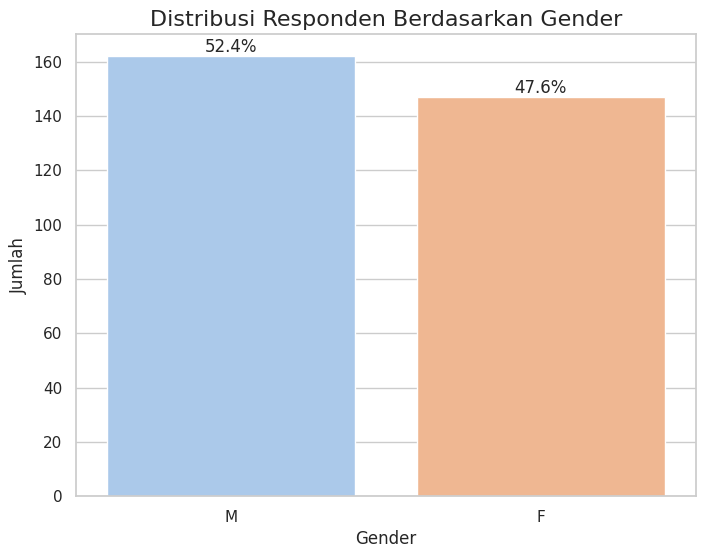

In [12]:
# Mengatur tema visualisasi seaborn
sns.set_theme(style="whitegrid")

# Visualisasi distribusi gender menggunakan countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='gender', hue='gender', palette='pastel', legend=False)
plt.title('Distribusi Responden Berdasarkan Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

# Menambahkan label persentase di atas setiap bar
total = len(df['gender'])
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12)

plt.show()

Visualisasi Distribusi Fitur Biner

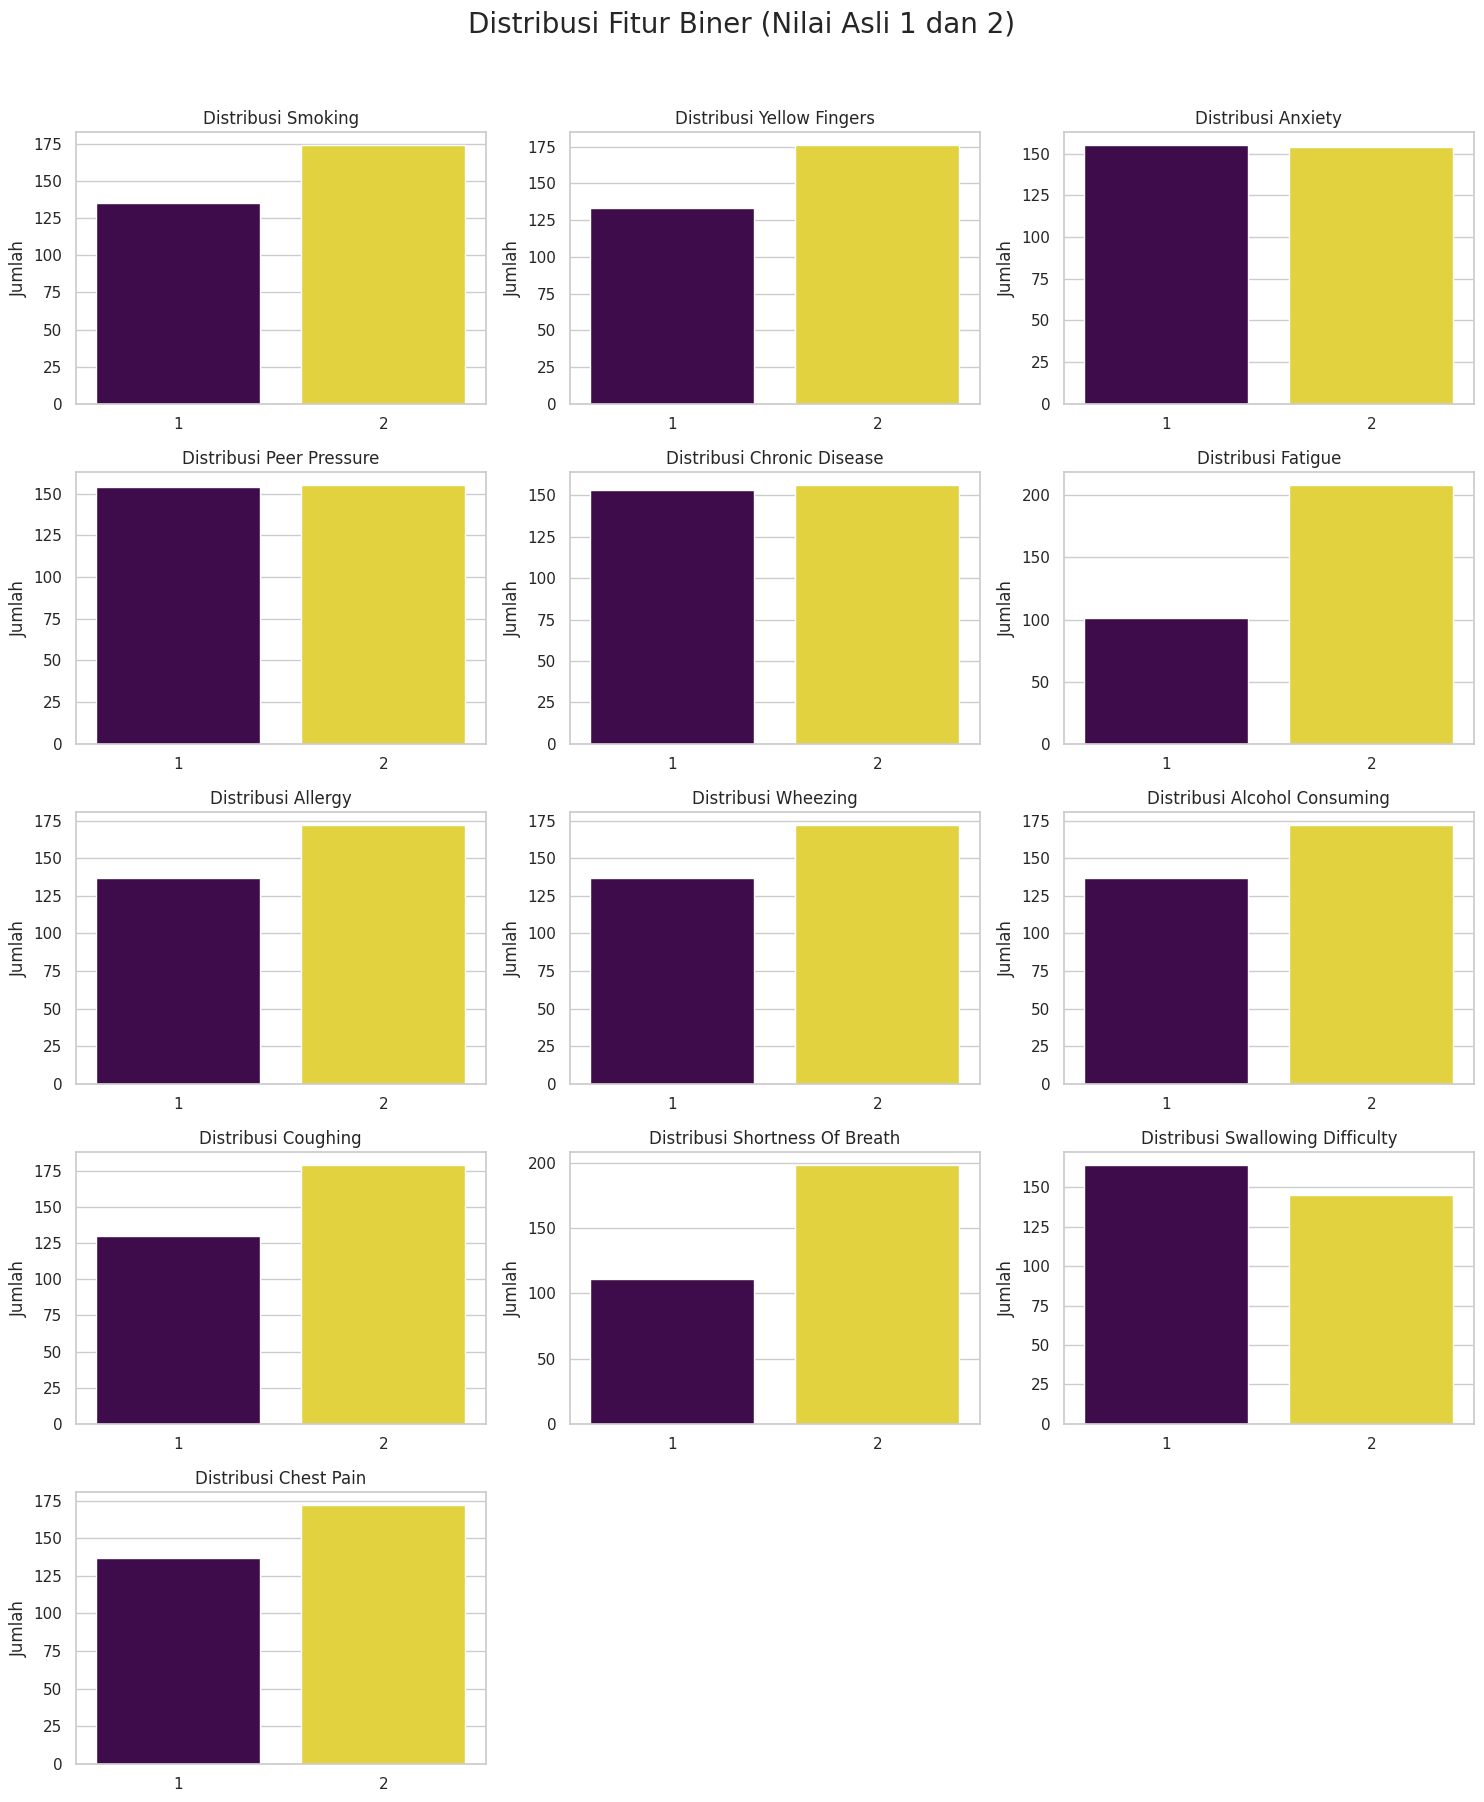

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Daftar fitur biner yang akan divisualisasikan
binary_features = [
    'smoking', 'yellow_fingers', 'anxiety', 'peer_pressure', 'chronic_disease',
    'fatigue', 'allergy', 'wheezing', 'alcohol_consuming', 'coughing',
    'shortness_of_breath', 'swallowing_difficulty', 'chest_pain'
]

# Membuat grid subplot (5 baris, 3 kolom) yang cukup untuk semua fitur
# fig adalah keseluruhan gambar, axes adalah array dari setiap plot individu
fig, axes = plt.subplots(5, 3, figsize=(15, 18))

# Meratakan array axes agar mudah di-loop (dari 2D menjadi 1D)
axes = axes.flatten()

# Melakukan loop untuk setiap fitur dan membuat countplot di subplot yang sesuai
for i, feature in enumerate(binary_features):
    # Menggunakan ax=axes[i] untuk menempatkan plot di subplot ke-i
    # Menambahkan hue=feature dan legend=False untuk mengatasi warning
    sns.countplot(ax=axes[i], x=feature, data=df, palette='viridis', hue=feature, legend=False, order=[1,2])

    # Mengatur judul untuk setiap subplot
    axes[i].set_title(f'Distribusi {feature.replace("_", " ").title()}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Jumlah')

# Menyembunyikan subplot yang tidak terpakai (jika ada)
for i in range(len(binary_features), len(axes)):
    axes[i].set_visible(False)

# Memberi judul utama untuk keseluruhan gambar
plt.suptitle('Distribusi Fitur Biner (Nilai Asli 1 dan 2)', fontsize=20, y=1.0)

# Mengatur layout agar tidak tumpang tindih
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

Visualisasi Distribusi Kanker Paru (Target)

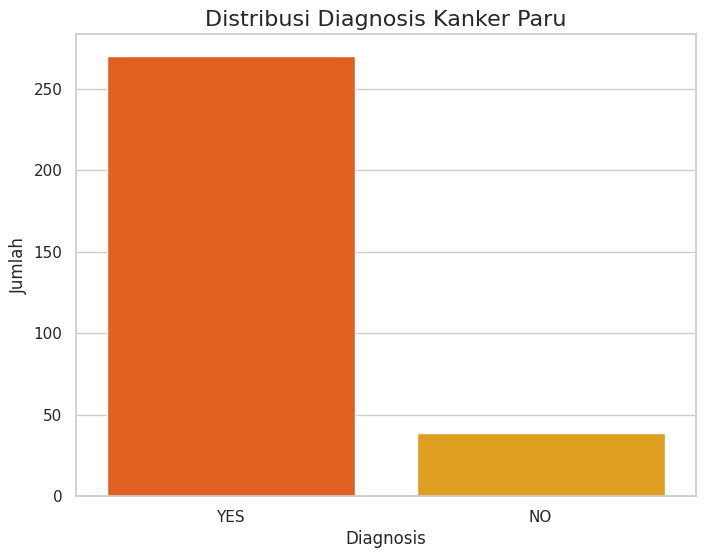

In [17]:
## Visualisasi Distribusi Diagnosis Kanker Paru
# Mengatur ukuran figure
plt.figure(figsize=(8, 6))

# Visualisasi distribusi Diagnosis Kanker Paru menggunakan countplot
# Menetapkan 'lung_cancer' ke x dan hue untuk mengatasi peringatan dan memastikan warna sesuai kategori
# legend=False digunakan karena hue sudah sama dengan x, jadi legend tidak diperlukan
ax = sns.countplot(data=df, x='lung_cancer', hue='lung_cancer', palette='autumn', legend=False)

# Menambahkan judul
plt.title('Distribusi Diagnosis Kanker Paru', fontsize=16)

# Menambahkan label sumbu X
plt.xlabel('Diagnosis', fontsize=12)

# Menambahkan label sumbu Y
plt.ylabel('Jumlah', fontsize=12)

# Menampilkan plot
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

 Encoding & Cek Duplikat

In [18]:
# Encoding kolom 'gender' dan 'lung_cancer'
# Ini dilakukan sebelum pengecekan duplikat agar 'M'/'F' dan 'YES'/'NO' konsisten
df['gender'] = df['gender'].map({'M': 0, 'F': 1})
df['lung_cancer'] = df['lung_cancer'].map({'YES': 1, 'NO': 0})

# Memeriksa dan menghitung data duplikat
duplicate_count = df.duplicated().sum()
print(f"Total baris data duplikat yang ditemukan: {duplicate_count}")

Total baris data duplikat yang ditemukan: 33


Hapus Duplikat

In [19]:
# Menghapus data duplikat
df_cleaned = df.drop_duplicates(keep='first').reset_index(drop=True)

print(f"Jumlah baris sebelum menghapus duplikat: {len(df)}")
print(f"Jumlah baris setelah menghapus duplikat: {len(df_cleaned)}")
print(f"Jumlah duplikat setelah dibersihkan: {df_cleaned.duplicated().sum()}")

Jumlah baris sebelum menghapus duplikat: 309
Jumlah baris setelah menghapus duplikat: 276
Jumlah duplikat setelah dibersihkan: 0


Normalisasi Nilai Biner

In [20]:
# Menggunakan kembali daftar fitur biner dari sel sebelumnya
# Mengubah nilai dari {1, 2} menjadi {0, 1}
for col in binary_features:
    df_cleaned[col] = df_cleaned[col].map({1: 0, 2: 1})

print("Data setelah normalisasi nilai biner:")
df_cleaned.head()

Data setelah normalisasi nilai biner:


,gender,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic_disease,fatigue,allergy,wheezing,alcohol_consuming,coughing,shortness_of_breath,swallowing_difficulty,chest_pain,lung_cancer
0,0,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,0,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,1,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,0,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,1,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


Matriks Korelasi

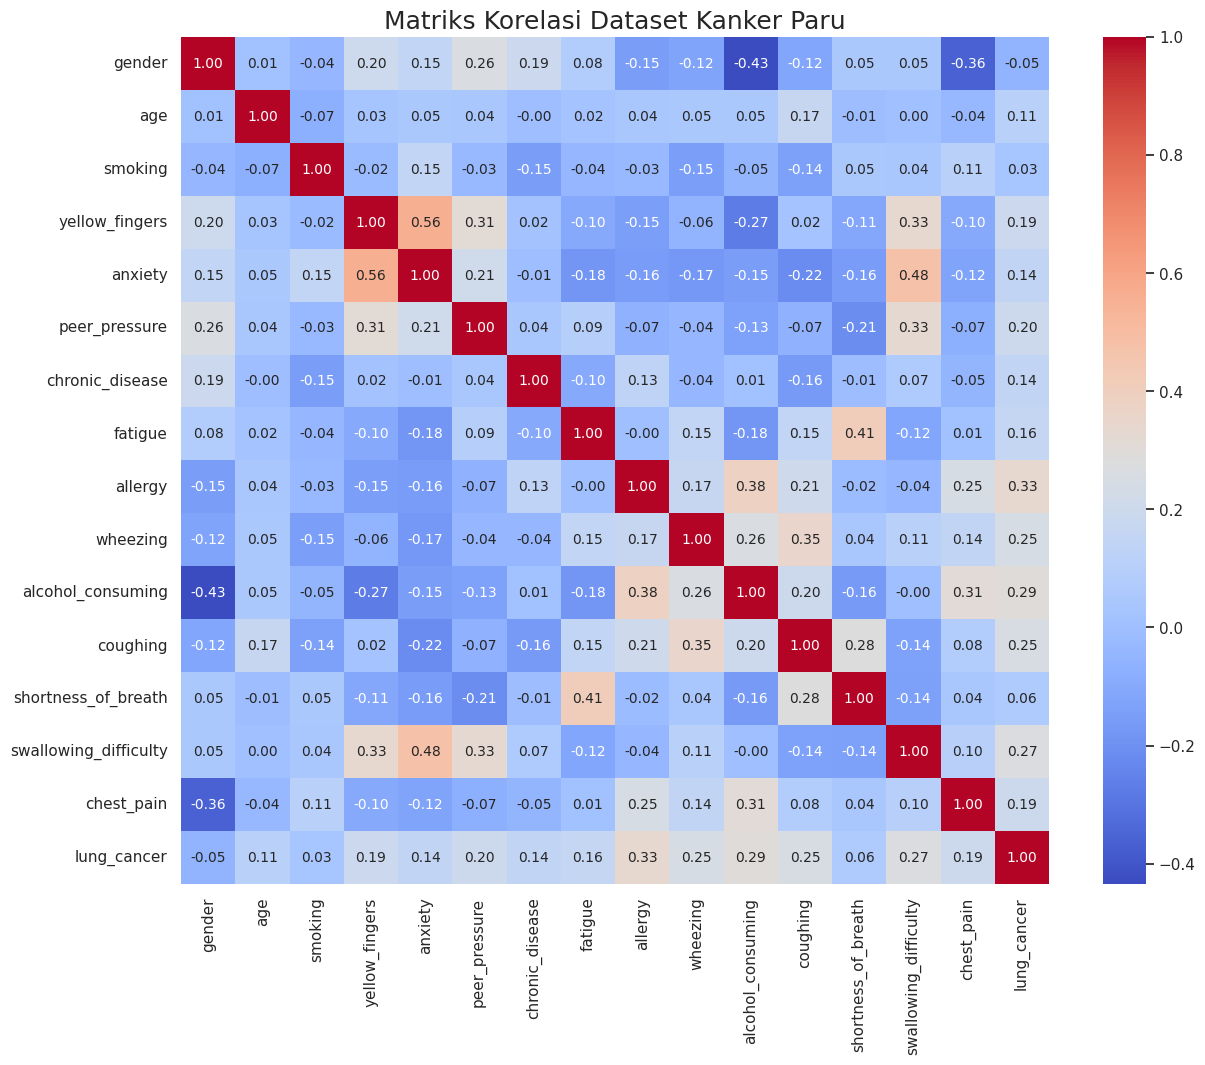

In [21]:
# Membuat matriks korelasi
correlation_matrix = df_cleaned.corr()

# Membuat heatmap dari matriks korelasi
plt.figure(figsize=(14, 11))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Matriks Korelasi Dataset Kanker Paru', fontsize=18)
plt.show()

Menyimpan Data Bersih

In [22]:
# Menyimpan DataFrame yang sudah bersih ke file CSV baru
df_cleaned.to_csv('survey_lung_cancer_clean.csv', index=False)

print("Data yang sudah diproses telah disimpan sebagai 'lung_cancer_clean.csv'")

Data yang sudah diproses telah disimpan sebagai 'lung_cancer_clean.csv'
